(512, 512, 3)


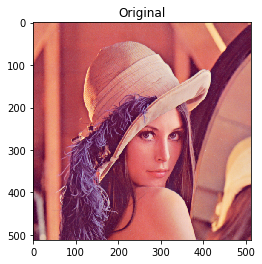

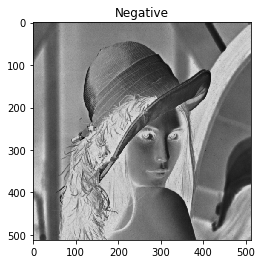

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def convertToGray(img): #convert RGB image to Graylevel
    grayImage = np.copy(img)
    Red = img[:,:,0]
    Green = img[:,:,1]
    Blue = img[:,:,2]
    grayLevel = (Red*0.21 + Green*0.71 + Blue*0.07)
    grayImage[:,:,0] = grayLevel
    grayImage[:,:,1] = grayLevel
    grayImage[:,:,2] = grayLevel
    return grayImage

imgLenna = plt.imread("Lenna.png")

grayImg = convertToGray(imgLenna)
negative = np.copy(grayImg)
L=np.max(grayImg)
Negative = L - grayImg
print(negative.shape)
negative[:,:,0] = 255 - negative[:,:,0]
negative[:,:,1] = 255 - negative[:,:,1]
negative[:,:,2] = 255 - negative[:,:,2]

    

#print(img[0,0])
#print(negative[0,0])

plt.imshow(imgLenna)
plt.title("Original")
plt.show()


plt.imshow(Negative)
plt.title("Negative")
plt.show()

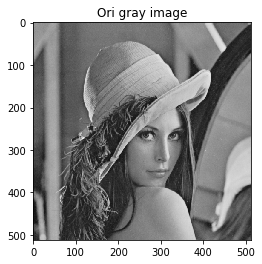

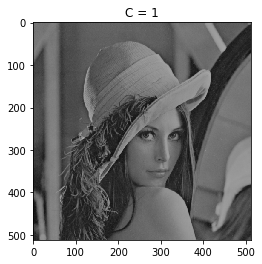

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


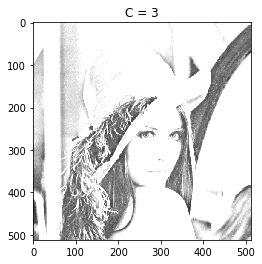

In [22]:
#Log Transformations

plt.imshow(grayImg)
plt.title("Ori gray image")
plt.show()

log5Trans = 5 * np.log1p(grayImg)

plt.imshow(log1Trans)
plt.title("C = 1")
plt.show()

log5Trans = 3 * np.log1p(grayImg)

plt.imshow(log5Trans)
plt.title("C = 3")
plt.show()

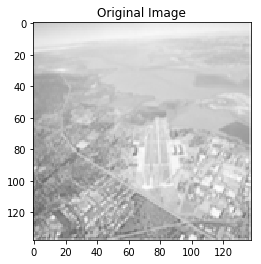

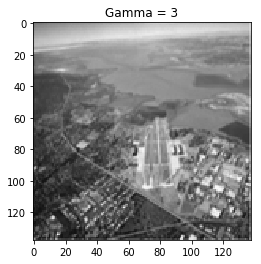

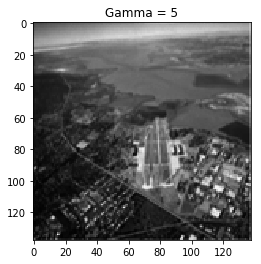

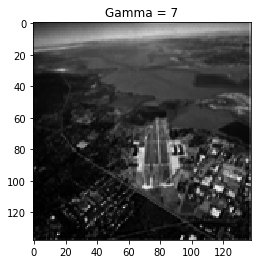

In [23]:
#Power Law Transformations
c = 1
gamma1 = 3
gamma2 = 5
gamma3 = 7

#imgLaw = plt.imread("mountain.jpeg")
imgLaw = plt.imread("TestImageLaw.png")
grayImgLaw = convertToGray(imgLaw)
plt.imshow(grayImgLaw)
plt.title("Original Image")
plt.show()

lawTrans1 = c * (grayImgLaw**(gamma1))
plt.imshow(lawTrans1)
plt.title("Gamma = 3")
plt.show()

lawTrans2 = c * (grayImgLaw**(gamma2))
plt.imshow(lawTrans2)
plt.title("Gamma = 5")
plt.show()

lawTrans2 = c * (grayImgLaw**(gamma3))
plt.imshow(lawTrans2)
plt.title("Gamma = 7")
plt.show()

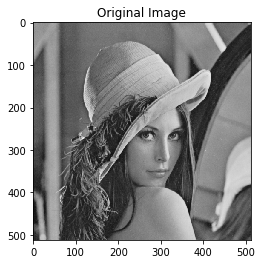

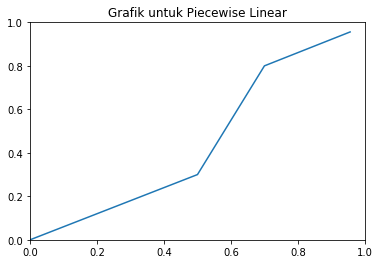

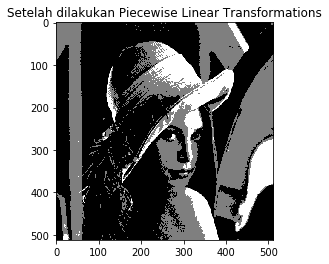

In [24]:
#Piecewise Linear Transformations

imgPiecewise = plt.imread("Lenna.png")
gray = convertToGray(imgPiecewise)

maxGrayLevel = np.max(gray)

plt.imshow(gray)
plt.title("Original Image")
plt.show()

x = [0, 0.5, 0.5, 0.7, maxGrayLevel]
y = [0, 0.3, 0.3, 0.8, maxGrayLevel]

plt.plot(x, y)
plt.title("Grafik untuk Piecewise Linear")
plt.axis([0, 1, 0, 1])
plt.show()

gray[gray < x[1]] = 0
gray[(gray >= x[1]) & (gray <= x[3]) ] = 0.5
gray[gray > x[3]] = 1

plt.imshow(gray)
plt.title("Setelah dilakukan Piecewise Linear Transformations")
plt.show()

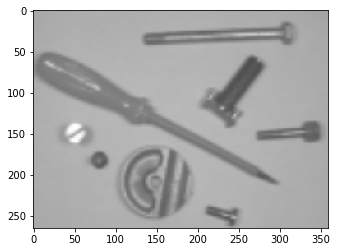

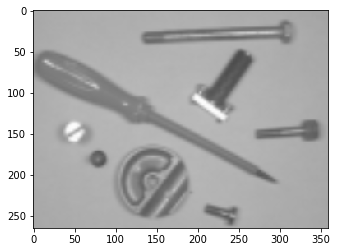

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


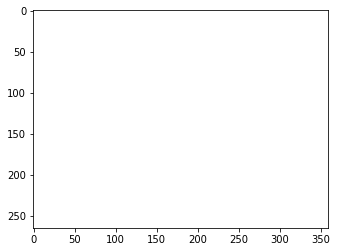

In [25]:
#Image Subtraction

imgSub1=plt.imread("and1.png")
imgSub2=plt.imread("and2.png")

def subtractOperation(img1, img2):
    subtract = np.subtract(img1,img2)
    return (subtract)

#Original Picture 1
#print(imgSub1[110,:])
plt.imshow(imgSub1)
plt.show()
#Original Picture 2
#print(imgSub2[110,:])
plt.imshow(imgSub2)
plt.show()
#resultImg
resultImg = subtractOperation(imgSub1,imgSub2)
#print((resultImg[110,:]))
plt.imshow(resultImg)
plt.show()

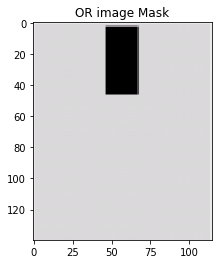

(140, 115, 4)


FileNotFoundError: [Errno 2] No such file or directory: 'TestBitwise.png'

In [26]:
#Logical operations

#OR
imageMask = plt.imread("OR.png")
plt.imshow(imageMask)
plt.title("OR image Mask")
plt.show()

print(imageMask.shape)

oriImage = plt.imread("TestBitwise.png")
gray = convertToGray(oriImage)
#plt.imshow(gray)
plt.imshow(gray)
plt.title("Original Image")
plt.show()

gray3d = np.stack([gray], axis=-1)
print(gray3d.shape)

ORLogicalImage = imageMask + gray

plt.imshow(ORLogicalImage)
plt.title("Setelah dilakukan OR Logical Image Operations")
plt.show()

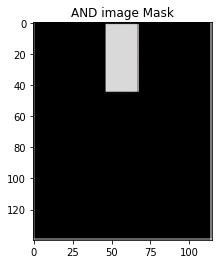

(140, 115, 4)


FileNotFoundError: [Errno 2] No such file or directory: 'TestBitwise.png'

In [27]:
#AND

imageMask = plt.imread("AND.png")
plt.imshow(imageMask)
plt.title("AND image Mask")
plt.show()

print(imageMask.shape)

oriImage = plt.imread("TestBitwise.png")
gray = convertToGray(oriImage)
print(gray.shape)
#plt.imshow(gray)
plt.imshow(gray)
plt.title("Original Image")
plt.show()

#gray3d = np.stack([gray], axis=-1)
#AndLogicalImage = imageMask * gray
AndLogicalImage = np.bitwise_and(imageMask, gray)

plt.imshow(AndLogicalImage)
plt.title("Setelah dilakukan AND Logical Image Operations")
plt.show()

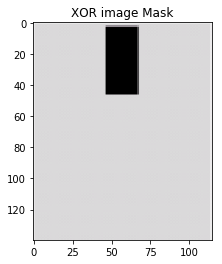

(140, 115, 4)


FileNotFoundError: [Errno 2] No such file or directory: 'TestBitwise.png'

In [28]:
#xor
imageMask = plt.imread("OR.png")
plt.imshow(imageMask)
plt.title("XOR image Mask")
plt.show()

print(imageMask.shape)

oriImage = plt.imread("TestBitwise.png")
gray = convertToGray(oriImage)
#plt.imshow(gray)
plt.imshow(gray)
plt.title("Original Gray Image")
plt.show()

#gray3d = np.stack([gray], axis=-1)
temp1 = (imageMask + gray)
temp2 = (imageMask * gray)
XORLogicalImage = temp1 - temp2

plt.imshow(temp1)
plt.show()

plt.imshow(temp2)
plt.show()

plt.imshow(XORLogicalImage)
plt.title("Setelah dilakukan XOR Logical Image Operations")
plt.show()

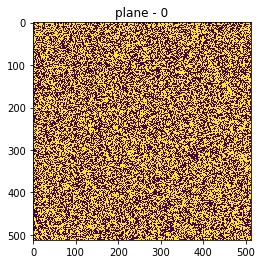

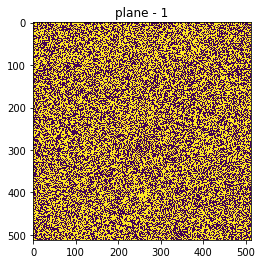

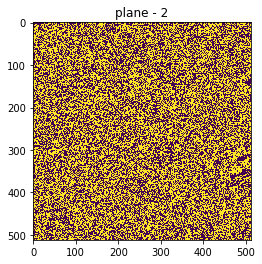

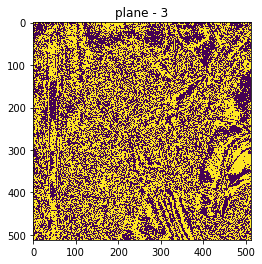

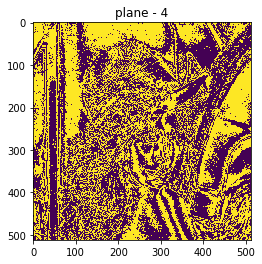

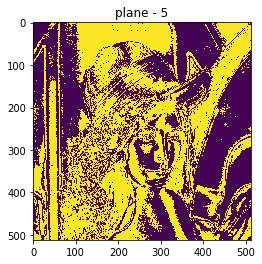

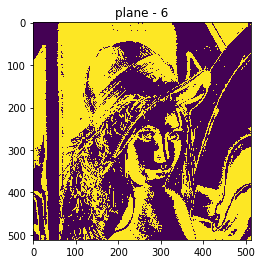

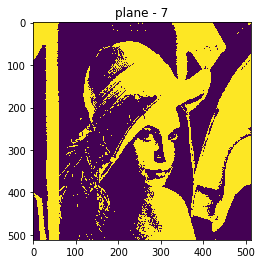

In [50]:
def bitPlane(img,plane):
    plane = 7 - plane
    [x,y] = np.shape(img)
    a = np.zeros((x,y))
    for i in range(0,x):
        for j in range(0,y):
            b = np.unpackbits(img[i,j])
            b = np.take(b,plane)
            if(b == 0):
                a[i,j] = 0
            else:
                a[i,j] = 255
    return a

def rgb2Gray(img):
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    gray = 0.21 * r + 0.71 * g + 0.07 *b
    return np.uint8(gray*255);

for i in range (0,8):
    plt.imshow(bitPlane(rgb2Gray(imgLenna),i))
    plt.title("plane - %i"%i)
    plt.show()

